# Image Alignment and Stitching

<center><img src="figs/04_stitched.png" width=800px alt="default"/></center>

# Last Lecture

- 01: Image Formation Models (Ch. 2)
- 02: Image Operators and Transforms (Ch. 3)
- **03: Feature Detection, Matching, Segmentation (Ch. 7)**
- 04: Image Alignment and Stitching (Ch. 8)
- 05: 3D Reconstruction (Ch. 13)

We saw how to find features:
- which can be "matched" for a downstream task,
- which are interesting in themselves (boundaries of objects).

# Last Lecture

- 01: Image Formation Models (Ch. 2)
- 02: Image Operators and Transforms (Ch. 3)
- **03: Feature Detection, Matching, Segmentation (Ch. 7)**
- 04: Image Alignment and Stitching (Ch. 8)
- 05: 3D Reconstruction (Ch. 13)

We saw how to find features:
- which can be "matched" for a **downstream task**,
- which are interesting in themselves (boundaries of objects).

# This Lecture

- 01: Image Formation Models (Ch. 2)
- 02: Image Operators and Transforms (Ch. 3)
- 03: Feature Detection, Matching, Segmentation (Ch. 7)
- **04: Image Alignment and Stitching (Ch. 8)**
- 05: 3D Reconstruction (Ch. 13)

# Definitions

$\color{#EF5645}{\text{Matching features}}$ means to find corresponding feature locations in different images.

$\color{#EF5645}{\text{Image alignment}}$ means to find the geometric transformation that can transform an image into another. This can be done using matched features.

$\color{#EF5645}{\text{Image stitching}}$ means "gluing" images together in a consistent way, for example to form a panorama. This can be done using image alignment.

<center><img src="figs/03_main2.png" width=600px alt="default"/></center>

# Image Alignment and Stitching

- **[Pairwise Alignment](#sec-syllabus)**
  - Linear least squares
  - Nonlinear least squares
  - Robustness
  
- [Stitching](#sec-ece)

- [Global Alignment](#sec-ece)

# Alignment via Matching

$\color{#EF5645}{\text{Image alignment}}$ means to find the **geometric transformation** that can transform an image into another. 

This can be done using matched features.

$\rightarrow$ Assume a set of matching feature points $\left\{x_i, x_i'\right\}_{i=1}^N$ has been computed.

<center><img src="figs/03_main2.png" width=600px alt="default"/></center>

# Geometric Transformations

Recall Geometric Transformations, and their parameters $p$:

<center><img src="figs/04_jac.png" width=900px alt="default"/></center>


# Alignment via Matching: LS


$\color{#6D7D33}{\text{Method}}$: Pairwise alignment from matching using least squares (LS).
- Given $N$ matched keypoints $\left\{x_i, x_i'\right\}_{i=1}^N$ in 2 images,
- Given a family of transformations $\hat x' = f(x; p)$ (parameters $p$),
- **Goal:** Find $p$ that minimize the LS problem:
$$ min_p E_{LS}(p) = \sum_{i=1}^N ||r_i||^2 = \sum_{i=1}^N ||f(x_i; p) - x_i'||^2.$$

where:
- $\hat x'_i = f(x_i; p)$: predicted location of keypoint $x_i$ in image 2,
- $r_i = \hat x'_i - x'_i$: residuals.

# Image Alignment and Stitching

- [Pairwise Alignment](#sec-syllabus)
  - **Linear least squares**
  - Nonlinear least squares
  - Robustness
  
- [Stitching](#sec-ece)

- [Global Alignment](#sec-ece)

# Taylor Expansion of Transformations

$\color{#EF5645}{\text{Taylor expansion and Jacobian of the transformation}}$:
- Consider the geometric transformation $\hat x' = f(x; p)$,
- Assume that $p$ is parameterized such that: $f(x, p=0) = f(x)$,

Then, a Taylor expansion in $p$ next to $p=0$, gives:
$$\begin{align*}
\hat x' 
&= f(x, p) \\
&= f(x, 0) + \frac{\partial f}{\partial p}(x, 0) (p - 0) + O(||p||^2)\\
&= x + J(x) p  + O(||p||^2),
\end{align*}
$$
where:
- $J(x) = \frac{\partial f}{\partial p}(x)$ is the Jacobian of the transformation $f$ wrt $p$.

# Linear Transformations

 Many geometric transformations, such as 2D translation, similarity, affine, have a linear relationship between:
- the amount of motion $\Delta \hat x = \hat x' - x$, and 
- the unknown transformation parameters $p$:
$$\Delta \hat x = \hat x' - x = J(x) p,$$
which allows to rewrite the Least Square problem conveniently.


$\color{#EF5645}{\text{Remark}}$: These are transformations where $J$ does not depend on $p$.

# Linear Regression Least Squares:


For linear transformations, rewrite the LS problem:
$$\begin{align*}
 min_p E_{LS}(p) 
 &=\sum_{i=1}^N ||f(x_i; p) - x_i'||^2\\
 &=\sum_{i=1}^N ||f(x_i; p) - x_i - x_i' + x_i||^2\\
 &=\sum_{i=1}^N ||\Delta \hat x_i - \Delta x_i||^2\\
 &= \sum_{i=1}^N ||J(x_i)p - \Delta x_i||^2 \\
 &= p^T \left[ \sum_{i=1}^N J^T(x_i)J(x_i)\right] p 
 - 2 p ^T \left[ \sum_{i=1}^N J^T(x_i) \Delta x_i \right]
 + \sum_{i=1}^N ||\Delta x_i ||^2 \\
 &= p^T A p - 2p^T b + c
\end{align*}$$

which is now a linear regression in $p$, whose solution is found by solving the system of normal equations with the Hessian $A$ and $b$ above: $$Ap = b.$$

# Image Alignment and Stitching

- [Image Alignment](#sec-syllabus)
  - Linear least squares
  - **Nonlinear least squares**
  - Robustness
  
- [Stitching](#sec-ece)

# Nonlinear Transformations

Other geometric transformations, such as 2D rigid Euclidean transformation, do not have a linear relationship between:
- the amount of motion $\Delta \hat x = \hat x' - x$, and
- the unknown transformation parameters $p$.

$\color{#EF5645}{\text{Remark}}$: These are the transformations where $J$ depends on $p$. For example, this is the case for the 2D rigid Euclidean transformation that depends on $\theta$.

Recall, for linear transformations:
- Find $p$ that minimizes: 
$$E_{LS}(p) =\sum_{i=1}^N ||f(x_i; p) - \Delta x_i||^2.$$

In contrast, for nonlinear transformations:
- Initialize with $p = p_0$
- Find $\Delta p$ that minimizes: 
$$E_{NLS}(\Delta p) =\sum_{i=1}^N ||f(x_i; p + \Delta p) - \Delta x_i||^2$$
- Update $p \leftarrow p + \Delta p$ until convergence

# Nonlinear Least Square Problem

For non-linear transformation, rewrite the LS problem in $\Delta p$ as:
$$
\begin{align*}
E_{NLS}(\Delta p) 
 &= \sum_{i=1}^N ||f(x_i; p+\Delta p) - x_i'||^2 \\ 
 &\simeq \sum_{i=1}^N ||J(x_i; p) \Delta p - r_i||^2 \\ 
 &= \Delta p ^T \left[ \sum_{i=1}^N J^T J \right] \Delta p 
 - 2 \Delta p^T \left[ \sum_{i=1}^N J^T r_i \right]
 + \sum_{i=1}^N ||r_i||^2 \\ 
 &= \Delta p ^T A \Delta p - 2 \Delta p ^T b + c
\end{align*}
$$

whose solution is found by solving the system of normal equations: 
$$(A + \lambda diag(A)) \Delta p = b$$
with:
- $\lambda$ damping parameter (described in textbook's Appendix A.3).


# Remark: Jacobian of the Homography

- Jacobians are given on previous slide, except for homography.
- For the homography:
<center><img src="figs/04_hom.png" width=1000px alt="default"/></center>


<center><img src="figs/04_hom_jac.png" width=1000px alt="default"/></center>

# Example: Transform betwen Keypoints

In [71]:
import numpy as np
from skimage import transform

# generate synthetic keypoints
src = np.array([0, 0, 10, 10]).reshape((2, 2)) #x_i
dst = np.array([12, 14, 1, -20]).reshape((2, 2))  #x_i'
print("src = ", src)
print("dst = ", dst)

# estimate transformation parameters
tform = transform.estimate_transform('similarity', src, dst)
print("\n", tform)

# print transform
print("\n", tform(src))  #\hat x_i' = f(x_i, p)

src =  [[ 0  0]
 [10 10]]
dst =  [[ 12  14]
 [  1 -20]]

 <SimilarityTransform(matrix=
    [[-2.25,  1.15, 12.  ],
     [-1.15, -2.25, 14.  ],
     [ 0.  ,  0.  ,  1.  ]])>

 [[ 12.  14.]
 [  1. -20.]]


# Limitations

$\color{#EF5645}{\text{Remark}}$: These methods use the $N$ keypoints in the same way: they are all asked to be matched with the same accuracy. However, certain matches may be less reliable than others.

$\rightarrow$ Towards robustness:

$\color{#EF5645}{\text{Robustness}}$: A method is called robust (to outliers) if it is not unduly affected by outliers.

# Image Alignment and Stitching

- [Pairwise Alignment](#sec-syllabus)
  - Linear least squares
  - Nonlinear least squares
  - **Robustness**
  
- [Stitching](#sec-ece)

- [Global Alignment](#sec-syllabus)

# Robustness via Weighted LS

Introducing weights can improve pairwise alignment:
- Associate a scalar variance estimate $\sigma_i^2$ and use the weighted least squares:
$$  min_p E_{LS}(p)  =\sum_{i=1}^N \sigma^{-2}_i||r_i||^2$$
- See Section 9.1.3 of the textbook for details on computing $\sigma_i$.

# Robustness via Keypoint Pre-Selection

Keypoint selection can improve pairwise alignment: 
- Select at random a subset of $k$ of $N$ matches $\left\{x_i, x_i'\right\}_{i=1}^N$,
- Compute geometric transformation parameter $\hat p$ of transformations

$\rightarrow$ Keep $\hat p$ that brings the best fit.

<center><img src="figs/04_outliers.png" width=300px alt="default"/></center>

- $\color{#EF5645}{\text{Inliers:}}$ Keypoints consistent with some particular parameter $\hat p$. (blue)

- $\color{#EF5645}{\text{Outliers:}}$ Keypoints that are not. (green)

# Keypoint Preselection

Two approaches:
- **RANdom SAmple Consensus (RANSAC)**
- Least Median of Squares (LMS)

# RANSAC

$\color{#EF5645}{\text{RANdom SAmple Consensus (RANSAC)}}$ is an algorithm for pairwise alignment of images through pre-selection of matching keypoints:
- Select at random a subset of $k$ of the $N$ matches $\left\{x_i, x_i'\right\}_{i=1}^N$,
- Compute geometric transformation parameter $\hat p$ of transformations
- Compute the residuals $r_i$, $i=1, ..., N$.
- Count the number of "inliers", i.e. keypoints that are within $\epsilon$ of predicted location:
  - $r_i \leq \epsilon$ where $\epsilon$ is application-dependent but often 1-3 pixels.
- Repeat selection process $S$ times.
- Keep sample of $k$ keypoints with largest number of inliers.
- Recompute $\hat p$ on all inliers.

<center><img src="figs/04_ransac.png" width=1000px alt="default"/></center>

# Choosing $S$

$\color{#EF5645}{\text{Notations:}}$
- $p$ probability that a given $(x_i, x_i')$ is an inlier,
- $P$ desired probability that all inliers are found after $S$ repeats.

$\rightarrow$ $p^k$ is probability that all are inliers in 1 trial for $k$ keypoints.

$\rightarrow$ We relate our desired probability to $S$ as:
Thus $1 - P = (1 - p^k)^S$. 

Thus, the required minimum of trials if we wish to have $P$ is:
$$ S = \frac{\log(1 - P)}{\log (1 - p^k)}.$$

# Keypoint Preselection: Choosing $S$

<center><img src="figs/04_s.png" width=1000px alt="default"/></center>

# Pros and Cons of RANSAC


Pros:
- Simple implementation
- Computational Efficiency

Cons:
- Need to choose 3 parameters: $\epsilon, k, S$.

# Keypoint Preselection

Two approaches:
- RANdom SAmple Consensus (RANSAC)
- **Least Median of Squares (LMS)**

# Replace Mean Square by Median

$\color{#6D7D33}{\text{Method}}$: Pairwise alignment from matching using least squares (LS).
- Given a set of $N$ matched feature points $\left\{x_i, x_i'\right\}_{i=1}^N$,
- Given a family of transformations $\hat x' = f(x; p)$ (parameters $p$),
- Goal: Find $p$ that minimize the LS problem:
$$ min_p E_{LS}(p) = ||r_{i_0}||^2,$$
where $i_0$ is the median of the data set.

$\color{#EF5645}{\text{Remark}}$: Hard to minimize medians directly, thus we use an algorithm with a selection process as in RANSAC.


# LMS

$\color{#EF5645}{\text{Least Median Square (LMS)}}$ is an algorithm for pairwise alignment of images through pre-selection of matching keypoints:
- Select at random a subset $k$ of $N$ matches $\left\{x_i, x_i'\right\}_{i=1}^N$,
- Compute geometric transformation parameter $\hat p$ of transformations
- Compute the residuals $r_i$, $i=1, ..., N$ for all keypoints.
- Compute the median $med$ is the median of the $r_i$'s, $i=1, ..., N$ for current $\hat p$.
- Keep sample $k$ with smallest median residual, and corresponding $\hat p$.

# Pros and Cons of LMS


Pros: 
- No need to choose 2 parameters: $\epsilon, S$.

Cons:
- Does not work well if there are more than half outliers.

# Image Alignment and Stitching


- [Pairwise Alignment](#sec-syllabus)
  - Linear least squares
  - Nonlinear least squares
  - Robustness

- **[Stitching](#sec-ece)**

- [Global Alignment](#sec-syllabus)


# Image stitching

Two steps:
- Align the images in a common reference frame,
- Average the pixel intensity there.


In [73]:
from matplotlib import pyplot as plt
import numpy as np
from skimage import data, util, transform, feature, measure, filters, metrics


def match_locations(img0, img1, coords0, coords1, radius=5, sigma=3):
    """Match image locations using SSD minimization.

    Areas from `img0` are matched with areas from `img1`. These areas
    are defined as patches located around pixels with Gaussian
    weights.

    Parameters:
    -----------
    img0, img1 : 2D array
        Input images.
    coords0 : (2, m) array_like
        Centers of the reference patches in `img0`.
    coords1 : (2, n) array_like
        Centers of the candidate patches in `img1`.
    radius : int
        Radius of the considered patches.
    sigma : float
        Standard deviation of the Gaussian kernel centered over the patches.

    Returns:
    --------
    match_coords: (2, m) array
        The points in `coords1` that are the closest corresponding matches to
        those in `coords0` as determined by the (Gaussian weighted) sum of
        squared differences between patches surrounding each point.
    """
    y, x = np.mgrid[-radius:radius + 1, -radius:radius + 1]
    weights = np.exp(-0.5 * (x ** 2 + y ** 2) / sigma ** 2)
    weights /= 2 * np.pi * sigma * sigma

    match_list = []
    for r0, c0 in coords0:
        roi0 = img0[r0 - radius:r0 + radius + 1, c0 - radius:c0 + radius + 1]
        roi1_list = [img1[r1 - radius:r1 + radius + 1,
                          c1 - radius:c1 + radius + 1] for r1, c1 in coords1]
        # sum of squared differences
        ssd_list = [np.sum(weights * (roi0 - roi1) ** 2) for roi1 in roi1_list]
        match_list.append(coords1[np.argmin(ssd_list)])

    return np.array(match_list)

## Data generation

- Generate a list of slightly tilted noisy images.

In [75]:
img = data.moon()

angle_list = [0, 5, 6, -2, 3, -4]
center_list = [(0, 0), (10, 10), (5, 12), (11, 21), (21, 17), (43, 15)]

img_list = [transform.rotate(img, angle=a, center=c)[40:240, 50:350]
            for a, c in zip(angle_list, center_list)]
ref_img = img_list[0].copy()

img_list = [util.random_noise(filters.gaussian(im, 1.1), var=5e-4, seed=seed)
            for seed, im in enumerate(img_list)]

psnr_ref = metrics.peak_signal_noise_ratio(ref_img, img_list[0])

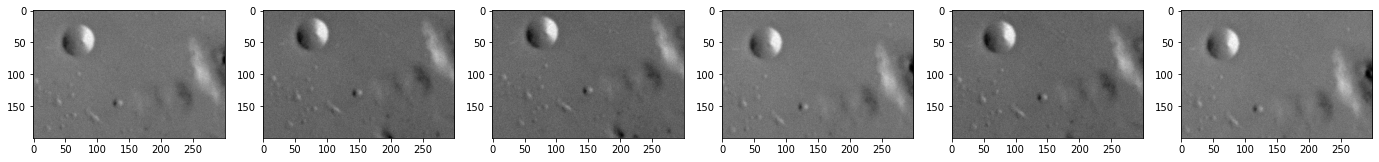

In [76]:
fig, axes = plt.subplots(ncols=6, figsize=(24, 4))
for i in range(len(angle_list)):
    axes[i].imshow(img_list[i], cmap=plt.cm.gray);

## Alignment

- Reference points are detected over all images in the list.

- Harris corners detected in the first image are chosen as references. Then the detected points on the other images are matched to the reference points.

In [80]:
min_dist = 5
corner_list = [feature.corner_peaks(
    feature.corner_harris(img), threshold_rel=0.001, min_distance=min_dist)
               for img in img_list]
print(len(corner_list))
# for i in range(len(corner_list)):
#     print(corner_list[i].shape)

6


In [78]:
img0 = img_list[0]
coords0 = corner_list[0]
matching_corners = [match_locations(img0, img1, coords0, coords1, min_dist)
                    for img1, coords1 in zip(img_list, corner_list)]
print(len(matching_corners))
for i in range(len(corner_list)):
    print(matching_corners[i].shape)

6
(41, 2)
(41, 2)
(41, 2)
(41, 2)
(41, 2)
(41, 2)


## RANSAC

Once all the points are registered to the reference points, robust relative affine transformations can be estimated using the RANSAC method.

In [81]:
src = np.array(coords0)
trfm_list = [
    measure.ransac(
        (dst, src),
        transform.EuclideanTransform, 
        min_samples=3,  # k
        residual_threshold=2, # epsilon
        max_trials=100)[0].params  # S
    for dst in matching_corners]

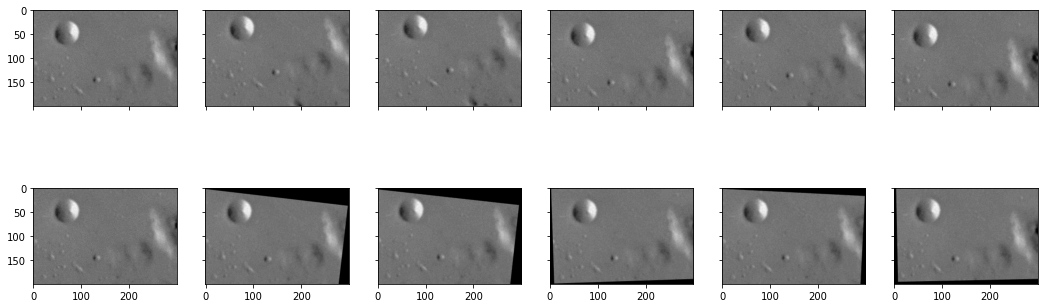

In [82]:
fig, axes = plt.subplots(2, 6, figsize=(18, 6), sharex=True, sharey=True)
for idx, (im, trfm) in enumerate(zip(img_list, trfm_list)):
    axes[0, idx].imshow(im, cmap="gray", vmin=0, vmax=1)
    axes[1, idx].imshow(transform.warp(im, trfm), cmap="gray", vmin=0, vmax=1)

## Stitching


A composite image can be obtained using the positions of the registered images relative to the reference one. 

$\rightarrow$ define a global domain around the reference image and position the other images in this domain.

A global transformation is defined to move the reference image in the global domain image via a simple translation:


In [83]:
margin = 50
height, width = img_list[0].shape
out_shape = height + 2 * margin, width + 2 * margin
glob_trfm = np.eye(3)
glob_trfm[:2, 2] = -margin, -margin

Relative position of the other images in the global domain are obtained by composing the global transformation with the relative transformations:

In [84]:
global_img_list = [transform.warp(img, trfm.dot(glob_trfm),
                                  output_shape=out_shape,
                                  mode="constant", cval=np.nan)
                   for img, trfm in zip(img_list, trfm_list)]

all_nan_mask = np.all([np.isnan(img) for img in global_img_list], axis=0)
global_img_list[0][all_nan_mask] = 1.

composite_img = np.nanmean(global_img_list, 0)

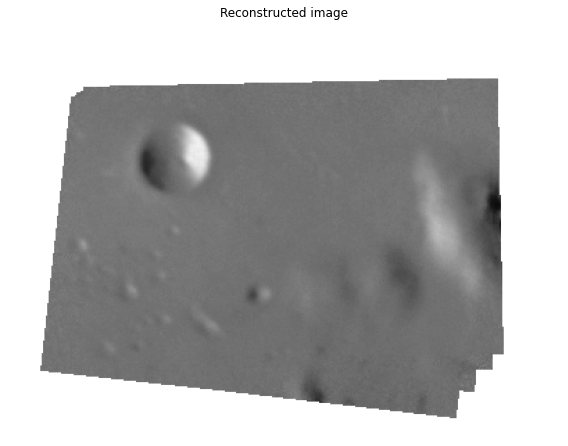

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.imshow(composite_img, cmap="gray", vmin=0, vmax=1)
ax.set_axis_off()
ax.set_title(f"Reconstructed image")
fig.tight_layout()

plt.show()

# Image Alignment and Stitching


- [Image Alignment](#sec-syllabus)
  - Linear least squares
  - Nonlinear least squares
  - Robustness

- [Stitching](#sec-ece)

- [Global Alignment](#sec-ece)

# Pairwise versus Global Alignment

Until now: pairwise alignment
- Fix an image $j_0$
- Find all $p_j$ that align all images $j$ to $j_0$

Global alignment: find a globally consistent set of alignment parameters $p$ that minimize the mis-alignment between all pairs of images:
- Find $p_{jk}$ that align all images $j$ and $k$

# Global Alignment: Notations

Assume we have an initial set of pairwise alignments from an image $j_0$ to each image $j$, i.e. a set of parameters $p_j$.

$\color{#EF5645}{\text{Notations}}$:
- $x_i$ is the ith keypoint in image $j_0$
- $x_{ij}$ is $ith$ keypoint in image $j$
- $p_{j}$ is the parameter of the transformation mapping keypoints from $j_0$ to keypoints from $j$

The pairwise alignment gives: $ x_{ij} = f(x_{i}, p_{j})$ such that: $x_{i} = f^{-1}(x_{ij}, p_{j})$
such that we can compute an alignment between features from $j$ and $k$ as:
$$x_{ik} = f(f^{-1}(x_{ij}, p_j), p_k) = F(x_{ij}, p_j, p_k)$$ 

$\color{#EF5645}{\text{Goal}}$: Refine $p_j$ by taking into account all pairs of images $(j, k)$.

# Bundle Adjustment

$\color{#EF5645}{\text{Bundle Adjustment}}$ is the process of simultaneously adjusting parameters $p$ and keypoint locations for a large collection of overlapping images.


$\color{#EF5645}{\text{Notations}}$:
- $x_{ij}$ is $ith$ keypoint in image $j$
- $p_{j}$ is the parameter of the transformation mapping keypoints from $j_0$ to keypoints from $j$
- $c_{ij}$ is the weight associated with $ith$ keypoint in image $j$

**First idea**: The associated LS problem could be written by summing over all pair $(j, k)$ of images.
$$ min_{p_j, p_k} E_{\text{all-pairs}} = \sum_{i=1}^N \sum_{jk} c_{ij}c_{ik} || F(x_{ij}, p_{j}, p_k)- x_{ik}||^2 .$$

# Limitations

- Keypoints that are observed in many images will be over-weighted, i.e. given extra importance: if these keypoints are bad, this is undesirable.
- Derivatives with respect to $p_j, p_k$ can be cumbersome.

# True Bundle Adjustment

$\color{#EF5645}{\text{Bundle Adjustment}}$ is the process of **simultaneously adjusting** parameters $p$ and keypoint locations for a large collection of overlapping images.

The bundle adjustment problem can be written as:
$$ min_{x_i, p_j} E_{\text{bundle}} = \sum_{i=1}^N \sum_{j} c_{ij} || f(x_i, p_j)- x'_{ij}||^2,$$
where the optimization is done:
- on the $x_i$ i.e. the keypoints on the image $j_0$,
- and on the transformation parameters $p_j$.

# Stitching

Stitching, after global alignment, is performed in a similar fashion.

# Image Alignment and Stitching


- [Image Alignment](#sec-syllabus)
  - Linear least squares
  - Nonlinear least squares
  - Robustness

- [Stitching](#sec-ece)

- [Global Alignment](#sec-ece)